# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Incorporated citipy to determine city based on latitude and longitude
# python -m pip install citipy
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["City Name"]

In [5]:
cities_df["Cloudiness"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Max Temperature"] = ""
cities_df["Wind Speed"] = ""

api_key = "c0e3244002f02998fec589455347e619"
row_counter = 1

settings = {"appid": api_key, "units": "imperial"}

base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="
query_url

print("Beginning Data Retrieval")
print("---------------------------")

for index, row in cities_df.iterrows():
    try:
        cities_response = requests.get(query_url + row["City Name"]).json()
        print(f"Processing record " + str(row_counter) + " : " + row["City Name"])
        row_counter += 1

        # Adding retrieved data into cities data frame
        cities_df.set_value(index, "Cloudiness", cities_response["clouds"]["all"])
        cities_df.set_value(index, "Date", cities_response["dt"])
        cities_df.set_value(index, "Humidity", cities_response["main"]["humidity"])
        cities_df.set_value(index, "Latitude", cities_response["coord"]["lat"])
        cities_df.set_value(index, "Longitude", cities_response["coord"]["lon"])
        cities_df.set_value(index, "Max Temperature", cities_response["main"]["temp_max"])
        cities_df.set_value(index, "Wind Speed", cities_response["wind"]["speed"])
    except:
        print(f"Data is not available for {row['City Name']}...skipping")
        continue
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
---------------------------
Processing record 1 : nikolskoye


C:\Users\DelL\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\DelL\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\DelL\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\DelL\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\DelL\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\DelL\Anaconda3\lib\site-pa

Processing record 2 : linfen
Processing record 3 : ushuaia
Processing record 4 : inhambane
Processing record 5 : hami
Processing record 6 : tsihombe
Data is not available for tsihombe...skipping
Processing record 7 : hilo
Processing record 8 : touros
Processing record 9 : kot addu
Processing record 10 : salinas
Processing record 11 : darapidap
Processing record 12 : rikitea
Processing record 13 : boiro
Processing record 14 : butaritari
Processing record 15 : kapaa
Processing record 16 : phan thiet
Processing record 17 : mys shmidta
Data is not available for mys shmidta...skipping
Processing record 18 : salalah
Processing record 19 : taolanaro
Data is not available for taolanaro...skipping
Processing record 20 : provideniya
Processing record 21 : havoysund
Processing record 22 : cabo san lucas
Processing record 23 : bredasdorp
Processing record 24 : mahebourg
Processing record 25 : punta arenas
Processing record 26 : norman wells
Processing record 27 : ataco
Processing record 28 : atuon

In [6]:
date = time.strftime('%m-%d-%Y', time.localtime(cities_df["Date"][0]))
date

'06-30-2019'

In [7]:
cities_df.head()

,City Name,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,nikolskoye,40,1561950944,72,59.7,30.79,62.01,6.71
1,linfen,0,1561950944,16,36.09,111.52,90.47,1.12
2,ushuaia,75,1561950889,59,-54.81,-68.31,37.4,16.11
3,inhambane,0,1561950945,89,-23.87,35.38,63.02,4.41
4,hami,92,1561950945,13,42.84,93.51,90.47,9.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

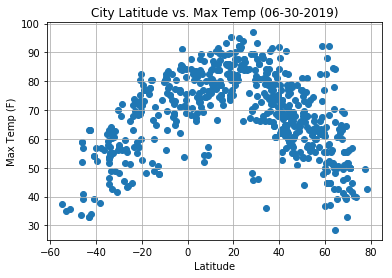

In [12]:
Lat = pd.to_numeric(cities_df["Latitude"])
Temp = pd.to_numeric(cities_df["Max Temperature"])
plt.scatter(Lat, Temp)
plt.title(f"City Latitude vs. Max Temp ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("Plots/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

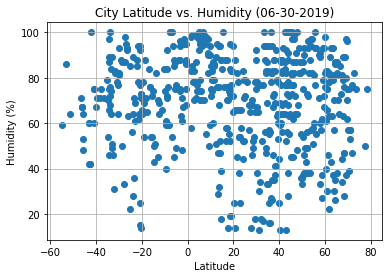

In [13]:
Lat = pd.to_numeric(cities_df["Latitude"])
Hum = pd.to_numeric(cities_df["Humidity"])
plt.scatter(Lat, Hum)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Plots/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

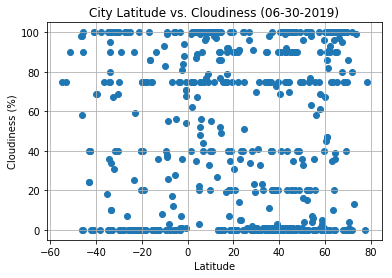

In [14]:
Lat = pd.to_numeric(cities_df["Latitude"])
Cld = pd.to_numeric(cities_df["Cloudiness"])
plt.scatter(Lat, Cld)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Plots/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

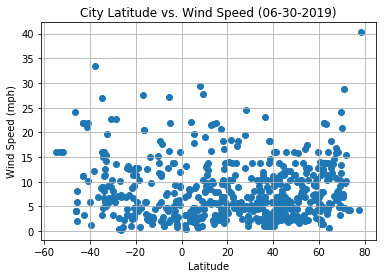

In [15]:
Lat = pd.to_numeric(cities_df["Latitude"])
Wind = pd.to_numeric(cities_df["Wind Speed"])
plt.scatter(Lat, Wind)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Plots/wind.png")
plt.show()

## Three Observable Trends

1. Temperatures are dropping as getting away from equator to the poles
2. The highest temperatures are seen around 20th parallel North
3. No solid correlation is observed between latitude and humidity, cloudiness or wind speed.